In [1]:
%matplotlib inline
timeSz = 32
from MakeModels import *
encoder = makeEncoder(timeSz)
decoder = makeDecoder()
autoencoder = makeAutoencoder(encoder,decoder)

autoencoder.load_weights('/home/ubuntu/SoftRobotRepresentation/ModelPrettyGoodBottleneck25.h5', by_name=True)

nFeatures = autoencoder.layers[-2].output_shape[-1]+4

Using TensorFlow backend.


In [ ]:
decoder.summary()

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import sklearn
import sklearn.decomposition as decomposition
from IPython.core.debugger import Pdb

feats = np.load('/home/ubuntu/SoftRobotRepresentation/Data/trainFeats.npy')

feats = feats[:,:-4]

def makeFeatureGood(feature):
    feature = np.expand_dims(feature,axis=0)
    feature = np.expand_dims(feature,axis=0)
    feature = np.expand_dims(feature,axis=0)
    return feature


pca = decomposition.PCA(n_components=5)
pca.fit(feats)

reconstruct = np.dot(pca.transform(feats),pca.components_)

In [ ]:
mn = makeFeatureGood(np.mean(feats))

# im_out = decoder.predict(makeFeatureGood(mn))
# plt.figure()
# plt.imshow(im_out[0,:])

component = 6
for i in range(1):
    im_out = decoder.predict(makeFeatureGood(feats[250,:]))
    plt.figure()
    plt.imshow(im_out[0,:])
    im_out = decoder.predict(makeFeatureGood(reconstruct[250,:]))
    plt.figure()
    plt.imshow(im_out[0,:])

In [41]:
from sklearn.neighbors import NearestNeighbors


randomFeatIdxs = np.random.randint(0,feats.shape[0],size=(2000,))
randomFeats = feats[randomFeatIdxs,:]
print randomFeats.shape 
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(randomFeats)

(2000, 25)


In [42]:
distances, indices = nbrs.kneighbors(randomFeats)

print indices

[[   0  715  554  960 1472]
 [   1  972  793  906 1035]
 [   2 1577 1563 1200  988]
 ..., 
 [1997 1990 1674 1897   21]
 [1998   14  199   32 1661]
 [1999  117  662 1257 1896]]


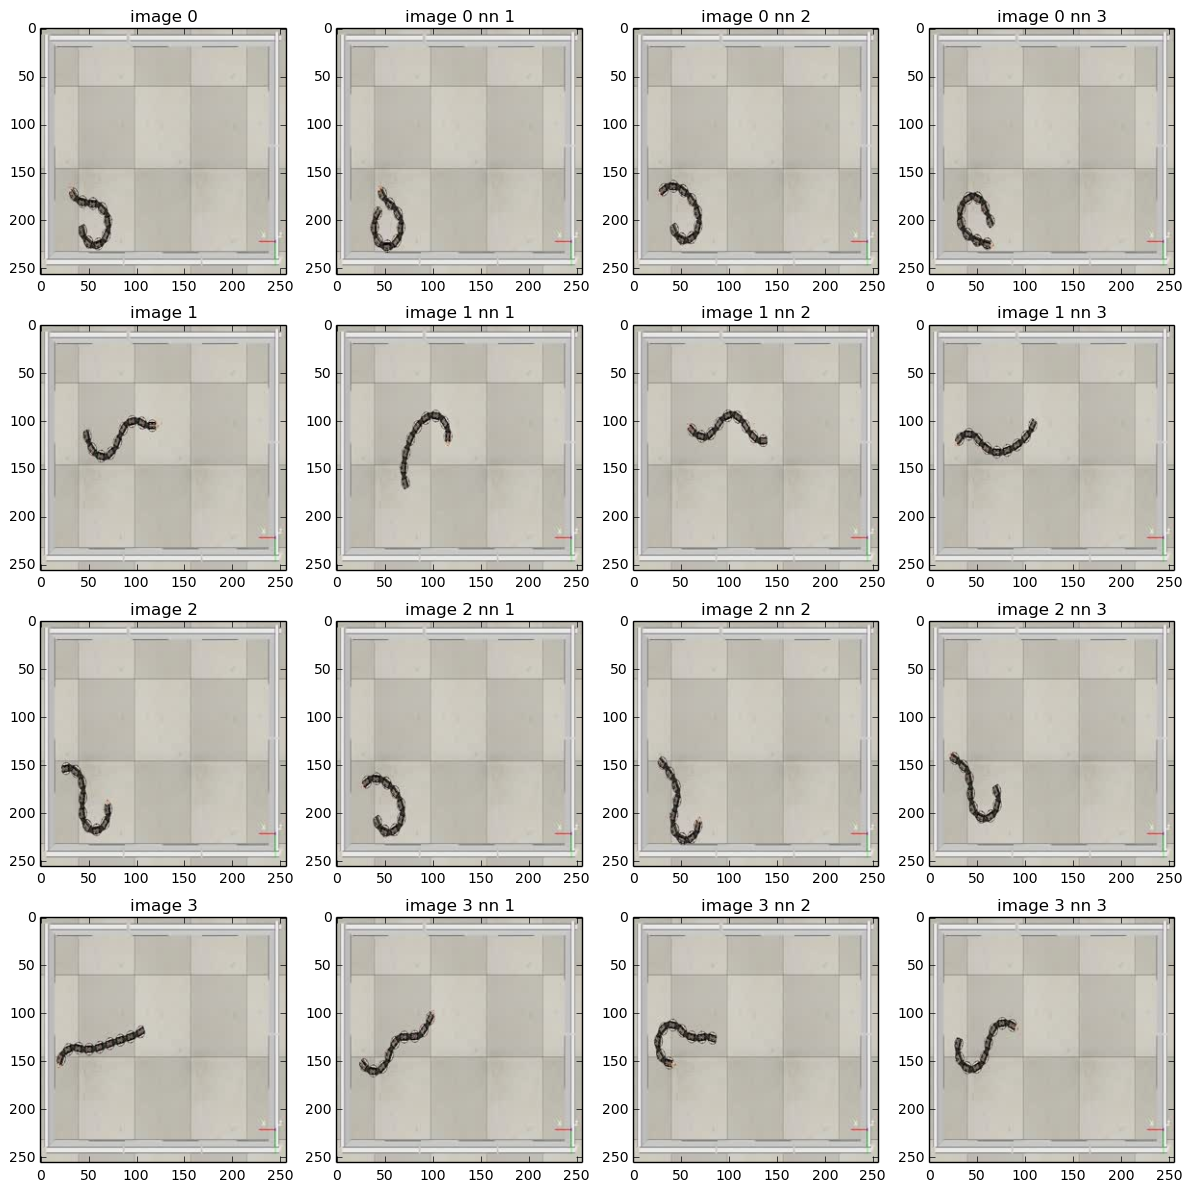

In [44]:
from IPython.core.debugger import Pdb

npoints = 4
idxs = np.random.randint(0,indices.shape[0],npoints)

valPath = '/home/ubuntu/SoftRobotRepresentation/Data/Training/0/'
def indexToImage(index):
    fname = '%s%06d.jpg'%(valPath,index)
    return plt.imread(fname)

# plt.figure(figsize=(12,12))/
fig,axes = plt.subplots(nrows=npoints,ncols=npoints,figsize=(12,12))
fig.tight_layout()
for i,idx in enumerate(idxs):
    plt.subplot(npoints,npoints,i*4+1)
    plt.imshow(indexToImage(randomFeatIdxs[idx]))
    plt.title('image %d'%i)
    for j in range(1,npoints):
        plt.subplot(npoints,npoints,i*npoints+j+1)
        plt.title('image %d nn %d'%(i,j))
        plt.imshow(indexToImage(randomFeatIdxs[indices[idx,j+1]]))
    

(52850, 2)
(52850, 25)
39969
yep
[ 4943.66439275  4923.96270803  4909.0251348  ...,  3453.10541848
  3453.10541848  3453.10541848]
[39969 39970 39968 ..., 15811 42367 16287]


(array([  8.00000000e+00,   7.00000000e+00,   3.80000000e+01,
          2.92000000e+02,   1.48800000e+03,   4.16500000e+03,
          1.76820000e+04,   2.28790000e+04,   6.01600000e+03,
          2.75000000e+02]),
 array([    0.        ,   662.95565763,  1325.91131525,  1988.86697288,
         2651.8226305 ,  3314.77828813,  3977.73394575,  4640.68960338,
         5303.645261  ,  5966.60091863,  6629.55657625]),
 <a list of 10 Patch objects>)

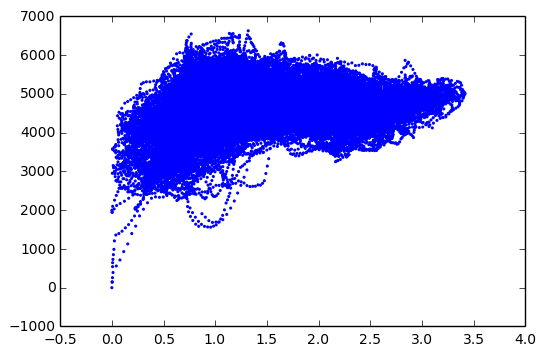

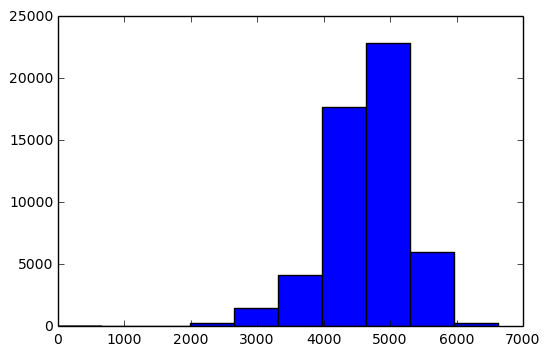

In [61]:
featuresTotal = np.load('/home/ubuntu/SoftRobotRepresentation/Data/trainFeats.npy')
featuresTotal = featuresTotal[:,:-2]

pointIdxs = range(featuresTotal.shape[0])#np.random.randint(0,featuresTotal.shape[0],npoints)
featPos = featuresTotal[pointIdxs,-2:]
print featPos.shape
featOnly = featuresTotal[pointIdxs,:-2]
print featOnly.shape

randomIndex = 39969#np.random.randint(0,featPos.shape[0],1)
print randomIndex

pos = featPos[randomIndex,:]
feat = featOnly[randomIndex,:]

deltaPos = pos-featPos
deltaFeat = feat-featOnly

distPos = np.sum(deltaPos**2,axis=1)**(1./2)
distFeat = np.sum(deltaFeat**2,axis=1)**(1./2)

plt.scatter(distPos,distFeat,marker='.',linewidths=0)

print "yep"
np.sort(distFeat)
print distFeat

print np.argsort(distFeat)

plt.figure()
plt.hist(distFeat)

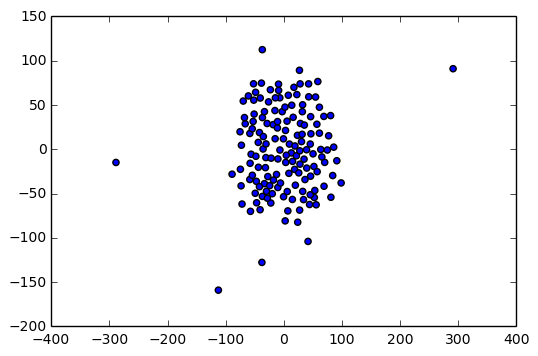

In [53]:
from sklearn import manifold

npoints = 1500
subsampled = feats[np.random.randint(0,feats.shape[0],npoints),:]
tsne = manifold.TSNE()
X = tsne.fit_transform(subsampled)

plt.scatter(X[:,0],X[:,1])